__EDA__ involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better.

As we noticed in the `Data_Wrangling` notebook, the data is pretty much clean with no NaN observations.

## Import libraries

In [1]:
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
# sns.set(rc={"figure.dpi":300})
# plt.rcParams["figure.dpi"] = 300


## Read data

In [2]:
# Importing train and test subsets
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
# Take a look at the data
train.sample(n=5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
150777,71d6ab5e66e9b5d7,Governor of the Bank of Jamaica.Im jamaican an...,0,0,0,0,0,0
41797,6f8229ffc9a3c190,!Why can't the wikipedians that do vandalism g...,0,0,0,0,0,0
88604,ed07ca3046831700,"""::::One does not need a sniper course to beco...",0,0,0,0,0,0
47151,7deaa944e8423de6,"Link removed, not allow under Wikipedia:Self-r...",0,0,0,0,0,0
70314,bc1eef29e9c6c4a2,"""\n\n Personally speaking (of course) I think ...",0,0,0,0,0,0


The data comes from a large number of Wikipedia comments which have been labeled by human raters for toxic behavior.

In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


## Data analysis

In [5]:
# print total observations in train and test subsets
print("Train: {}".format(train.shape))
print("Test:  {}".format(test.shape))

Train: (159571, 8)
Test:  (153164, 2)


In [6]:
# Copy dataframe for manipulation
X = train.copy()

# Check for clean comments
X["tags"] = np.sum(X.iloc[:, 2:], axis=1)
print(X["tags"].sample(10))
X["is_clean"] = X["tags"].apply(lambda x : 1 if x == 0 else 0)

13389     0
152340    0
105388    0
87295     0
12353     0
13386     0
86189     0
45067     0
147850    0
38347     0
Name: tags, dtype: int64


We can notice that there are multiple cases where a comment has more than one label.

In [7]:
X.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tags,is_clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,1


In [8]:
total_comm = X.shape[0]
total_clean_comm = X["is_clean"].sum()
total_not_clean_comm = total_comm - total_clean_comm

print("Total comments: {}".format(total_comm))
print("Total clean comments: {}".format(total_clean_comm))
print("Total not clean comments: {}".format(total_not_clean_comm))

Total comments: 159571
Total clean comments: 143346
Total not clean comments: 16225


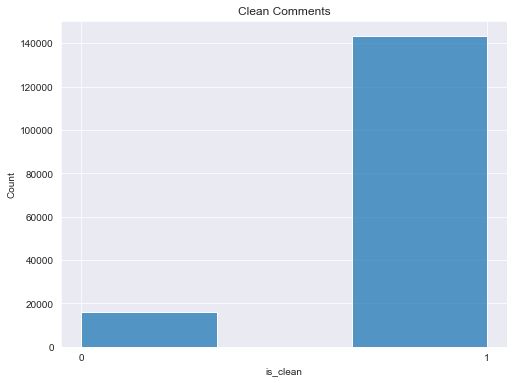

In [9]:
# Visualization of comments
f, ax = plt.subplots(figsize=(8, 6))
sns.histplot(X["is_clean"], bins=3)
ax.set_xticks([0, 1])
ax.set_title("Clean Comments")
plt.show()

In [10]:
comment_types = X.iloc[:, 2:-2].sum()
print(comment_types)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


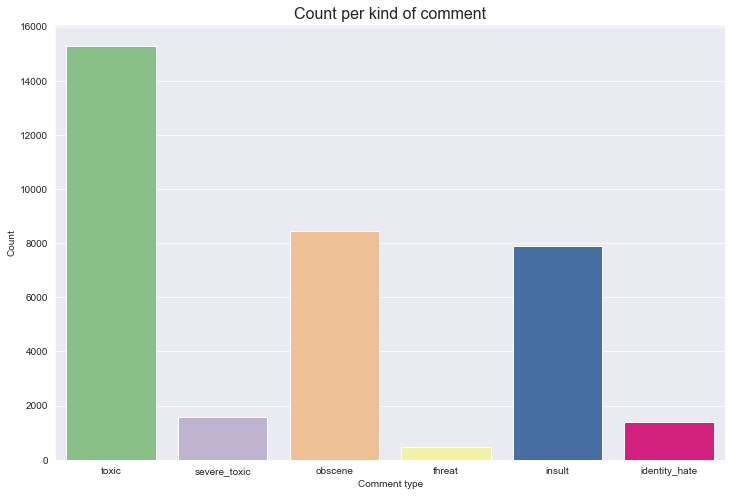

In [11]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(
    x=comment_types.index,
    y=comment_types.values,
    palette="Accent"
)
ax.set_title("Count per kind of comment", fontsize=16)
ax.set_xlabel("Comment type")
ax.set_ylabel("Count")
plt.show()

As from the above graph, we notice that the different types of comments are not normally distributed, so we might face a class imbalance problem.

Let's check how many coments have multiple tags

In [12]:
count_tags = X["tags"].value_counts()
print(count_tags)

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: tags, dtype: int64


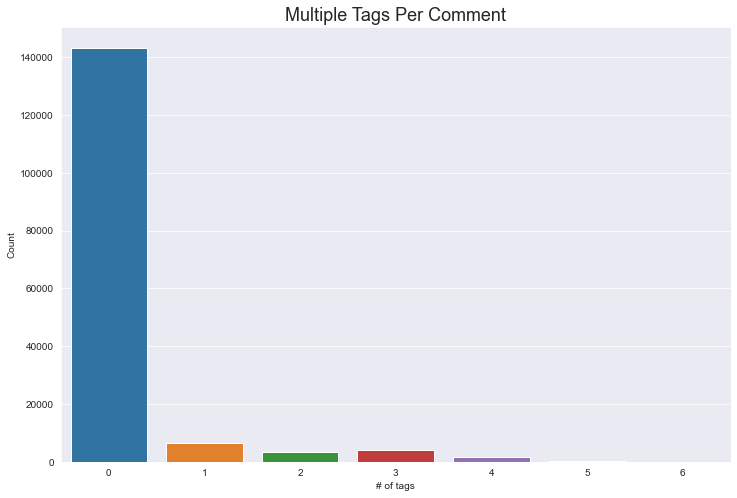

In [13]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(
    x=count_tags.index,
    y=count_tags.values
)
ax.set_title("multiple tags per comment".title(),
            fontsize=18)
ax.set_xlabel("# of tags")
ax.set_ylabel("Count")
plt.show()

## Relationship between features

Let's have a look at the relation between tags.

In [14]:
# Correlation plot
# Isolate columns for our correlation matrix.
corr_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
corr_df = X[corr_columns]

# Correlation matrix
corr = corr_df.corr()
corr

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


We can see that there is not a negative correlation between tags

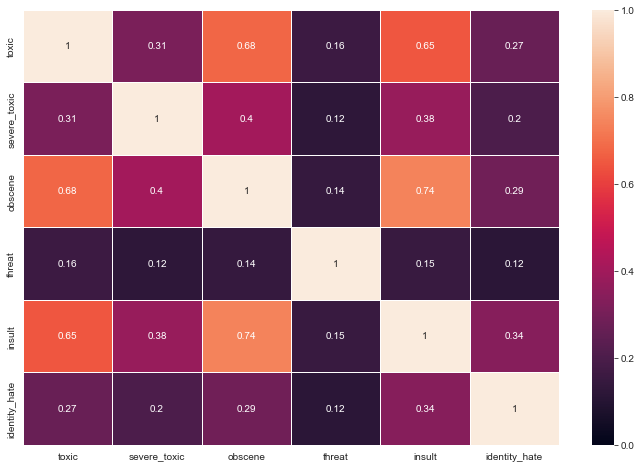

In [15]:
# Visualize correlation matrix
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    linewidths=0.5,
    ax=ax,
    vmin=0,
    vmax=1
)
plt.show()

The above plot indicates a pattern of co-occurrance. It does not apply here, since the variables involved are `categorical` variables.

In [16]:
column_names = corr_columns + ["is_clean"]
for col in column_names:
    print("\n* {} comment:".format(col))
    print(X[X[col] == 1]["comment_text"].iloc[np.random.randint(0, 20)])


* toxic comment:
"

SORRY PUCK BUT NO ONE EVER SAID DICK WAS NUMBER ONE!! But he is clearly listed as being ""second only to Batman"" and a ""master detective and martial artist"" and been trained in all the mentioned combat discplines. No need to mention in skills/abilities about the battles he's lost and won because thats not what an encylopia is supposed to do. 

Also, what your problem is your going by low end showings and not HIGH end showings where he's proven more than a match for a meta like Slade and pinned Shiva down in one of his earliest appearences.
 "

* severe_toxic comment:
Fuck you faggot, I don't care if i get blocked, as long as everyone knows you are a dumb cunt.

* obscene comment:
All of my edits are good.  Cunts like you who revert good edits because you're too stupid to understand how to write well , and then revert other edits just because you've decided to bear a playground grudge, are the problem.  Maybe one day you'll realise the damage you did to a noble p

We can see that each comment is includes alphanumeric and special symbols.